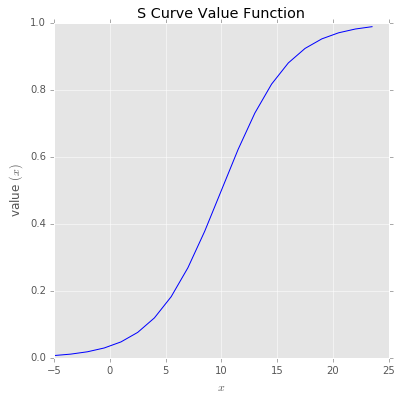

In [45]:
# Plot Sigmoid Function
# The logistic function looks like an elongated S
# Also consider generalised logistic function 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

####################
# Input Values Here:
scale = 3
offset = 10
flip = 0                    # Flip = 1 to reverse curve
###################

# Define the Sigmoid Function
def sigmoid(t):                         
    return (1/(1 + np.e**(-t))) 

plot_range = np.arange(-5, 5, 0.5) 
y_values = sigmoid(plot_range)

# Plot curve
plt.figure(figsize=(6,6))

if flip == 0:
    plt.plot((plot_range*scale)+offset, y_values, color="blue")
else:
    plt.plot((plot_range*scale)+offset, 1-y_values, color="blue")

plt.title('S Curve Value Function')
plt.xlabel('$x$')
plt.ylabel('value $(x)$')


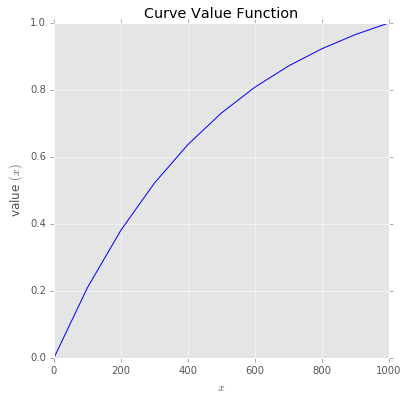

In [48]:
# Plot Exponential Function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####################
# Input Values Here:
low = 0.0                        # important to keep input a float
high = 1000.0                    # important to keep input a float
increment = 11
rho = 500
# Simply switch value inputs for low and high for the inverse function
###################

# Define the Exponential Function
x = np.linspace(low, high, increment)
y = (1 - np.exp(-(x - low)/rho))/(1 - np.exp(-(high - low)/rho))

# Plot curve
plt.figure(figsize=(6,6))
plt.plot(x, y,'b-') 
plt.title('Curve Value Function')
plt.xlabel('$x$')
plt.ylabel('value $(x)$')
plt.show()


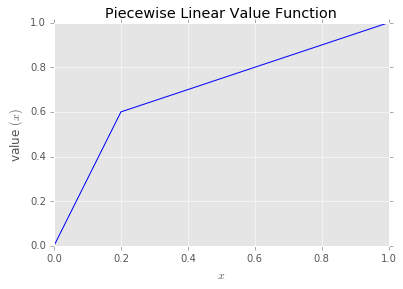

In [40]:
# Plot Piecewise Linear Function

import numpy
#import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

####################
# Input Coordinates:
x1 = 0
y1 = 0

x2 = .2 
y2 = .6

x3 = 1 
y3 = 1
###################

plt.plot([x1,x2,x3],[y1,y2,y3],'b-')
plt.title('Piecewise Linear Value Function')
plt.xlabel('$x$')
plt.ylabel('value $(x)$')
plt.show()
